## Predicting Bank Deposit by Logistic Regression

 Predict whether a new customer will subscribe to a term deposit or not based on their banking behavior using Logistic Regression.

 [Dataset Link](https://drive.google.com/file/d/18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ/view?usp=sharing)

In [9]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
data_dir = "bank-full.csv"
df = pd.read_csv(data_dir, sep=';')

print(df.head())
print(df.shape)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
(45211, 17)


In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
y_train.value_counts()

y
no     31970
yes     4198
Name: count, dtype: int64

In [13]:
y_train.value_counts(normalize=True)
y_val.value_counts(normalize=True)

y
no     0.879354
yes    0.120646
Name: proportion, dtype: float64

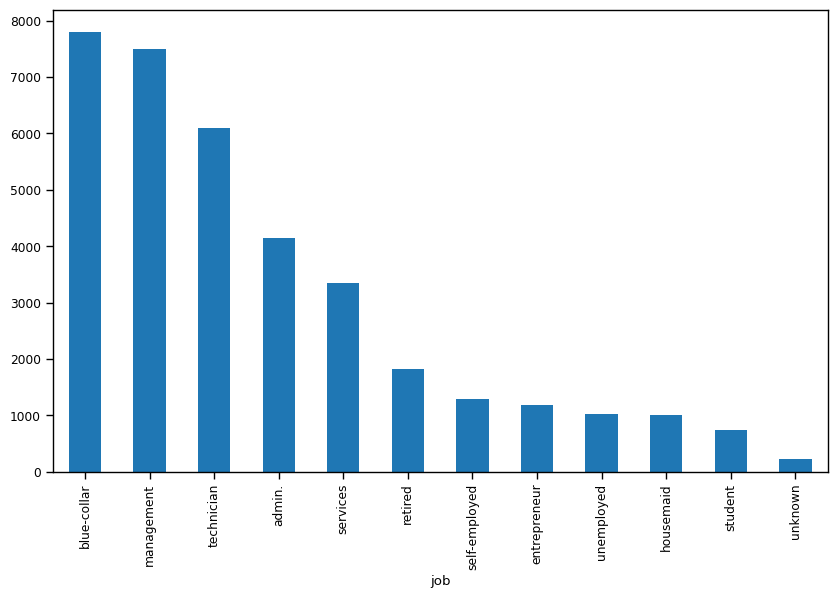

In [17]:
sns.set_context('paper')
x_train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [18]:
#job vs subscribed
print(pd.crosstab(x_train['job'], y_train))

y                no   yes
job                      
admin.         3641   496
blue-collar    7242   564
entrepreneur   1076   102
housemaid       908    94
management     6484  1016
retired        1411   404
self-employed  1128   158
services       3046   304
student         535   207
technician     5433   663
unemployed      859   164
unknown         207    26


In [19]:
y_train.replace('no', 0,inplace=True)
y_train.replace('yes', 1,inplace=True)
y_val.replace('no', 0,inplace=True)
y_val.replace('yes', 1,inplace=True)

x_train = pd.get_dummies(x_train)
x_val = pd.get_dummies(x_val)


x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
17965,49,1415,30,269,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18299,42,3842,31,130,4,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
10221,37,-119,11,375,11,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
32192,56,3498,15,264,2,-1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_val)
score = accuracy_score(y_val,predictions) * 100
print("Accurracy is : ", score, "%")

Accurracy is :  88.88643149397323 %


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC auc score =  0.8530684565689277


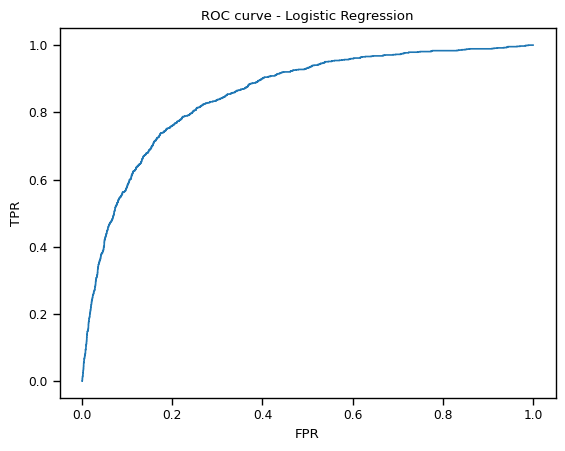

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
logistic_regression_predictions = model.predict_proba(x_val)[:,1]
logistic_regression_auc = roc_auc_score(y_val, logistic_regression_predictions)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_val, logistic_regression_predictions)
print("ROC auc score = ",roc_auc_score(y_val, logistic_regression_predictions))
plt.plot(logistic_regression_fpr, logistic_regression_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Logistic Regression')
plt.show()

The logistic regression model is designed to forecast whether a customer will opt for a term deposit by analyzing their banking behavior. Improving and fine-tuning the model parameters, along with exploring alternative machine learning algorithms, may contribute to enhancing its predictive accuracy.